In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = fetch_california_housing(as_frame=True)
df_housing = data.frame

## 📊 Mô tả các cột dữ liệu

| Tên cột              | Giải thích |
|----------------------|------------|
| **MedInc**           | **Thu nhập trung vị** của cư dân trong khu vực (tính theo đơn vị: chục nghìn USD). Ví dụ: `8.3252` tương đương với khoảng `$83,252`. |
| **HouseAge**         | **Tuổi trung bình của các căn nhà** trong khu vực (tính bằng năm). |
| **AveRooms**         | **Số phòng trung bình** mỗi hộ dân trong khu vực. |
| **AveBedrms**        | **Số phòng ngủ trung bình** mỗi hộ dân. |
| **Population**       | **Tổng dân số** trong khu vực. |
| **AveOccup**         | **Số người trung bình** sống trong một hộ. |
| **Latitude**         | **Vĩ độ** của khu vực (tọa độ địa lý). |
| **Longitude**        | **Kinh độ** của khu vực (tọa độ địa lý). |
| **MedHouseVal**      | **Giá trị nhà trung vị** trong khu vực (tính theo đơn vị: trăm nghìn USD). |

In [3]:
print("First 5 rows of the dataset:")
print(df_housing.head())

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [32]:
print("Row with max HouseAge:")
print(df_housing[df_housing["HouseAge"] == df_housing["HouseAge"].max()])


Row with max HouseAge:
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5      4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6      3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
...       ...       ...       ...        ...         ...       ...       ...   
20142  1.8618      52.0  4.157718   1.073826       934.0  3.134228     34.36   
20220  4.1250      52.0  5.639798   1.057935       941.0  2.370277     34.28   
20236  2.3750      52.0  4.289720   1.046729       276.0  2.579439     34.27   
20237  3.5893      52.0  4.707463   1.023881       836.0  2.495522     34.27   
20592  0.8928      52.0  4.442953   1.073826       520.0  3.489933     39.14   

       Longitude

In [20]:
print("\nDataset Info:")
df_housing.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


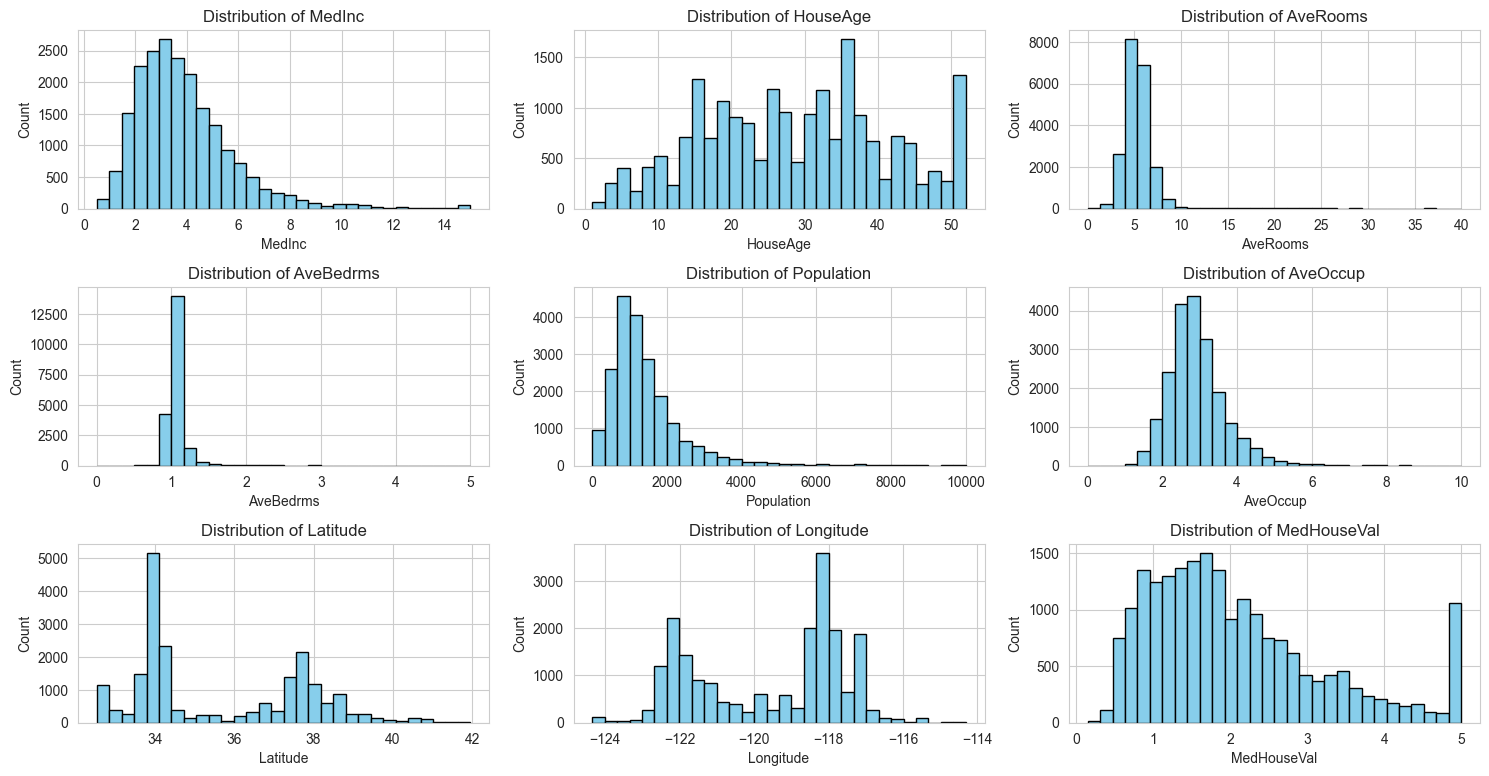

In [4]:
zoom_range = {
    "AveRooms": (0, 40),
    "AveBedrms": (0, 5),
    "AveOccup": (0, 10),
    "Population": (0, 10000)
}

plt.figure(figsize=(15, 10))
features = df_housing.columns

for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    if feature in zoom_range:
        plt.hist(df_housing[feature], bins=30, range=zoom_range[feature], color='skyblue', edgecolor='black')
    else:
        plt.hist(df_housing[feature], bins=30, color='skyblue', edgecolor='black')

    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [5]:
features = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude",
            "MedHouseVal"]

scaler = MinMaxScaler()
df_housing[features] = scaler.fit_transform(df_housing[features])

## 🧠 Định nghĩa "Khu đáng sống"

Một **khu đáng sống** là nơi hội tụ các điều kiện lý tưởng cho cư dân sinh sống, bao gồm:

- **Thu nhập cao** → thể hiện nền kinh tế ổn định.
- **Nhà mới** → an toàn, hiện đại, ít hư hỏng.
- **Không gian sống rộng rãi**:
  - `AveRooms`: Số phòng trung bình mỗi hộ (bao gồm phòng khách, bếp, phòng làm việc...).
  - `AveBedrms`: Số phòng ngủ trung bình mỗi hộ.
- **Mật độ sống thoải mái**:
  - `AveOccup`: Số người trung bình sống trong một hộ. Quá đông → không gian chật chội, ảnh hưởng chất lượng sống.
  - `Population`: Dân số trong khu vực. Quá đông → hạ tầng bị quá tải.
- **Vị trí địa lý thuận lợi**:
  - `Latitude`, `Longitude`: Khu gần biển, gần trung tâm, hoặc có khí hậu dễ chịu thường được đánh giá cao.
- **Khả năng tiếp cận về tài chính**:
  - `MedHouseVal`: Giá nhà trung bình trong khu vực.
  - Giá nhà vừa phải có thể làm khu vực trở nên hấp dẫn hơn với nhiều nhóm dân cư.
  - Tuy nhiên, giá nhà quá thấp cũng có thể phản ánh chất lượng sống kém.



In [6]:
def compute_living_score(df):
    score = (
            0.4 * df["MedInc"]
            - 0.3 * df["HouseAge"]
            + 0.1 * df["AveRooms"]
            + 0.05 * df["AveBedrms"]
            - 0.2 * df["Population"] / 1000
            - 0.3 * df["AveOccup"]
            + 0.1 * df["Latitude"]
            + 0.1 * df["Longitude"]
            - 0.3 * df["MedHouseVal"]
    )

    df["LivingScore"] = score
    return df

In [7]:
df_housing = compute_living_score(df_housing)

In [8]:
print(df_housing["LivingScore"].describe())

count    20640.000000
mean        -0.104006
std          0.105027
min         -0.512080
25%         -0.173166
50%         -0.101211
75%         -0.025574
max          0.283416
Name: LivingScore, dtype: float64


In [9]:
def assign_living_level(df):
    if "LivingScore" not in df.columns:
        raise ValueError("LivingScore not found. Run compute_living_score() first.")

    df["LivingLevel"] = pd.cut(
        df["LivingScore"],
        bins=[-np.inf, -0.17, -0.03, np.inf],
        labels=["Low", "Medium", "High"]
    )

    return df

In [10]:
assign_living_level(df_housing)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,LivingScore,LivingLevel
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,0.902266,-0.207320,Low
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,0.708247,-0.032746,Medium
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,0.695051,-0.238798,Low
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,0.672783,-0.278440,Low
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,0.674638,-0.328136,Low
...,...,...,...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701,0.130105,-0.041027,Medium
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749,0.128043,0.028063,High
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753,0.159383,-0.000575,High
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793,0.143713,0.002075,High


In [11]:
print(df_housing['LivingLevel'].value_counts())


LivingLevel
Medium    9916
High      5409
Low       5315
Name: count, dtype: int64


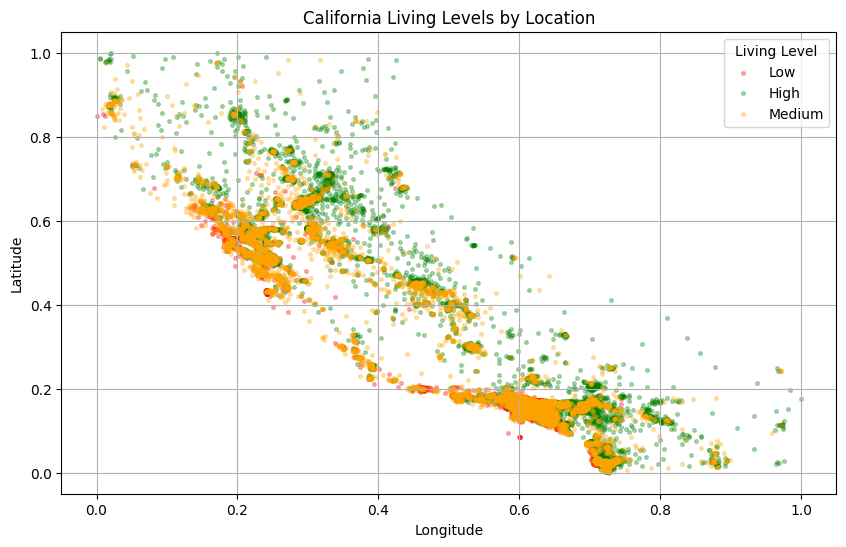

In [22]:
colors = {"Low": "red", "Medium": "orange", "High": "green"}
order = df_housing["LivingLevel"].value_counts().sort_values().index.tolist()

plt.figure(figsize=(10, 6))
for level in order:  # vẽ ít trước
    subset = df_housing[df_housing["LivingLevel"] == level]
    plt.scatter(
        subset["Longitude"], subset["Latitude"],
        c=colors[level], label=level, alpha=0.3, s=7
    )

plt.title("California Living Levels by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Living Level")
plt.grid(True)
plt.show()

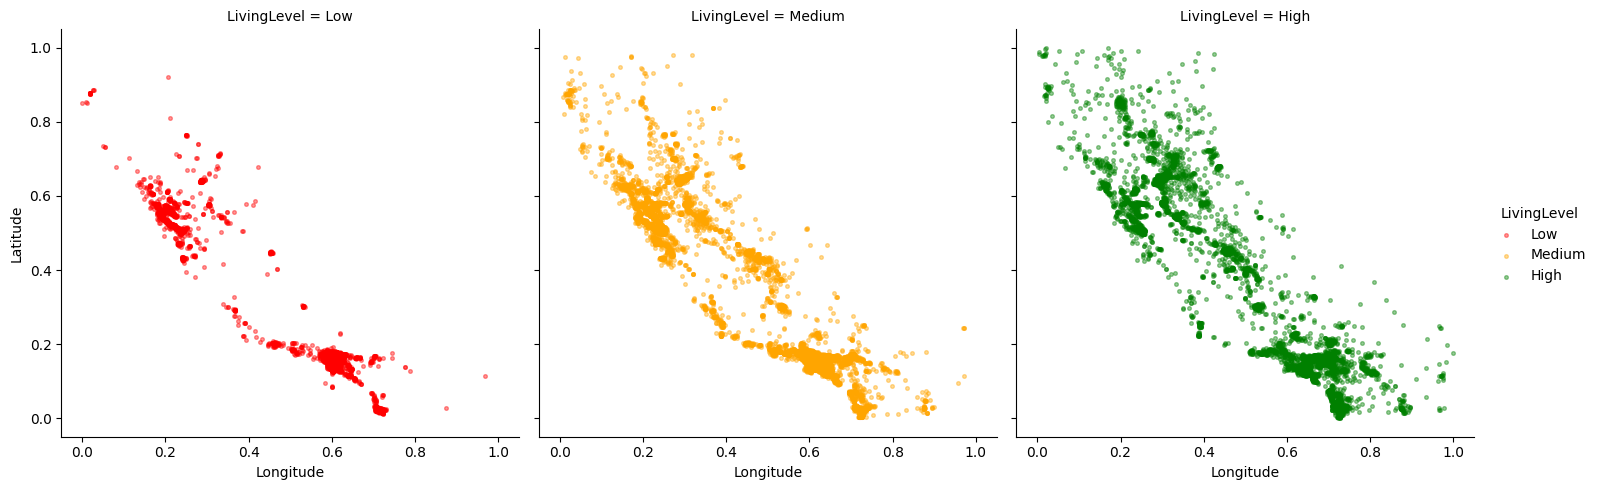

In [25]:
g = sns.FacetGrid(df_housing, col="LivingLevel", hue="LivingLevel", palette=colors, height=5)
g.map(plt.scatter, "Longitude", "Latitude", alpha=0.4, s=7)
g.add_legend()

In [26]:
df_housing.to_csv("./dataset/housing.csv", index=False)
print("✅ File đã lưu")

✅ File đã lưu


In [16]:
# Map LivingLevel sang số: Low -> 0, Medium -> 1, High -> 2
level_mapping = {"Low": 0, "Medium": 1, "High": 2}
df_housing["LivingLevel"] = df_housing["LivingLevel"].map(level_mapping)

# Chia train/test như cũ nhưng dùng dữ liệu đã được mã hóa số
train_df, test_df = train_test_split(
    df_housing,
    test_size=0.2,
    random_state=42,
    stratify=df_housing["LivingLevel"]
)

# Lưu ra file .csv
train_df.to_csv("./dataset/housing_train.csv", index=False)
test_df.to_csv("./dataset/housing_test.csv", index=False)

In [17]:
print(train_df['LivingLevel'].value_counts())

LivingLevel
1    7933
2    4327
0    4252
Name: count, dtype: int64


In [18]:
print(test_df['LivingLevel'].value_counts())

LivingLevel
1    1983
2    1082
0    1063
Name: count, dtype: int64
